In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker

In [2]:
dir = '/work/mh0033/m301036/LSAT/Data/ERA5/'

# Read in data
ds = xr.open_dataset(dir+'ERA20C-ERA5_190001-202212.nc')
ds

<xarray.Dataset>
Dimensions:    (time: 1476, longitude: 360, latitude: 181)
Coordinates:
  * time       (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2022-12-01
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 -90.0 -89.0 -88.0 -87.0 ... 88.0 89.0 90.0
Data variables:
    msl        (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sun Jul 09 10:29:51 2023: cdo mergetime temp1_inv.nc temp2....
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...

In [3]:
ds = ds.astype(np.float64)
# ds['msl'] = ds['msl']/100.0
# ds['msl'].attrs['units'] = 'hPa'
ds

<xarray.Dataset>
Dimensions:    (time: 1476, latitude: 181, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2022-12-01
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 -90.0 -89.0 -88.0 -87.0 ... 88.0 89.0 90.0
Data variables:
    msl        (time, latitude, longitude) float64 1.011e+05 ... 1.023e+05
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sun Jul 09 10:29:51 2023: cdo mergetime temp1_inv.nc temp2....
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...

In [4]:
#calculate the monthly mean anomalies
ds_clim = ds.groupby('time.month').mean('time')
ds_anom = ds.groupby('time.month') - ds_clim
ds_anom

<xarray.Dataset>
Dimensions:    (time: 1476, longitude: 360, latitude: 181)
Coordinates:
  * time       (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2022-12-01
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 -90.0 -89.0 -88.0 -87.0 ... 88.0 89.0 90.0
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    msl        (time, latitude, longitude) float64 345.8 345.8 ... 623.2 623.2

In [5]:
# ds_anom_rein = ds_anom.reindex(latitude=ds_anom['latitude'][::-1])
# ds_anom_rein

In [6]:
slp_anom = ds_anom.sel(time=slice('2008-01-01', '2022-12-31'), latitude=slice(0, 90))
# slp_ds = slp_anom.to_dataset()
slp_anom


<xarray.Dataset>
Dimensions:    (time: 180, longitude: 360, latitude: 91)
Coordinates:
  * time       (time) datetime64[ns] 2008-01-01 2008-02-01 ... 2022-12-01
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 0.0 1.0 2.0 3.0 4.0 ... 87.0 88.0 89.0 90.0
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    msl        (time, latitude, longitude) float64 -72.15 -70.01 ... 623.2 623.2

In [7]:
# Calculate the linear trend of each season
slp_DJF = slp_anom['msl'].sel(time=slp_anom['time.season']=='DJF')
slp_MAM = slp_anom['msl'].sel(time=slp_anom['time.season']=='MAM')
slp_JJA = slp_anom['msl'].sel(time=slp_anom['time.season']=='JJA')
slp_SON = slp_anom['msl'].sel(time=slp_anom['time.season']=='SON')
slp_DJF, slp_MAM, slp_JJA, slp_SON
slp_SON.min()

slp_anom['slp_DJF_mean'] = slp_DJF.groupby('time.year').mean('time')
slp_anom['slp_MAM_mean'] = slp_MAM.groupby('time.year').mean('time')
slp_anom['slp_JJA_mean'] = slp_JJA.groupby('time.year').mean('time')
slp_anom['slp_SON_mean'] = slp_SON.groupby('time.year').mean('time')
slp_anom

<xarray.Dataset>
Dimensions:       (time: 180, longitude: 360, latitude: 91, year: 15)
Coordinates:
  * time          (time) datetime64[ns] 2008-01-01 2008-02-01 ... 2022-12-01
  * longitude     (longitude) float32 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * latitude      (latitude) float32 0.0 1.0 2.0 3.0 4.0 ... 87.0 88.0 89.0 90.0
    month         (time) int64 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12
  * year          (year) int64 2008 2009 2010 2011 2012 ... 2019 2020 2021 2022
Data variables:
    msl           (time, latitude, longitude) float64 -72.15 -70.01 ... 623.2
    slp_DJF_mean  (year, latitude, longitude) float64 -61.04 -58.75 ... -220.5
    slp_MAM_mean  (year, latitude, longitude) float64 -106.0 -104.4 ... -288.3
    slp_JJA_mean  (year, latitude, longitude) float64 -130.8 -129.7 ... -212.3
    slp_SON_mean  (year, latitude, longitude) float64 -73.34 -72.03 ... -346.9

In [8]:
# Calculate the linear trend of each season
# Calculate the linear trend of each season using linregress
from scipy.stats import linregress

def calc_trend(data):
    slope, intercept, r_value, p_value, std_err = linregress(np.arange(len(data)), data)  
    return slope, p_value

slp_anom['slope_DJF'], slp_anom['p_value_DJF'] = xr.apply_ufunc(calc_trend, slp_anom['slp_DJF_mean'], input_core_dims=[['year']], output_core_dims=[[],[]], vectorize=True)
slp_anom['slope_MAM'], slp_anom['p_value_MAM'] = xr.apply_ufunc(calc_trend, slp_anom['slp_MAM_mean'], input_core_dims=[['year']], output_core_dims=[[],[]], vectorize=True)
slp_anom['slope_JJA'], slp_anom['p_value_JJA'] = xr.apply_ufunc(calc_trend, slp_anom['slp_JJA_mean'], input_core_dims=[['year']], output_core_dims=[[],[]], vectorize=True)
slp_anom['slope_SON'], slp_anom['p_value_SON'] = xr.apply_ufunc(calc_trend, slp_anom['slp_SON_mean'], input_core_dims=[['year']], output_core_dims=[[],[]], vectorize=True)
slp_anom


<xarray.Dataset>
Dimensions:       (time: 180, longitude: 360, latitude: 91, year: 15)
Coordinates:
  * time          (time) datetime64[ns] 2008-01-01 2008-02-01 ... 2022-12-01
  * longitude     (longitude) float32 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * latitude      (latitude) float32 0.0 1.0 2.0 3.0 4.0 ... 87.0 88.0 89.0 90.0
    month         (time) int64 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12
  * year          (year) int64 2008 2009 2010 2011 2012 ... 2019 2020 2021 2022
Data variables: (12/13)
    msl           (time, latitude, longitude) float64 -72.15 -70.01 ... 623.2
    slp_DJF_mean  (year, latitude, longitude) float64 -61.04 -58.75 ... -220.5
    slp_MAM_mean  (year, latitude, longitude) float64 -106.0 -104.4 ... -288.3
    slp_JJA_mean  (year, latitude, longitude) float64 -130.8 -129.7 ... -212.3
    slp_SON_mean  (year, latitude, longitude) float64 -73.34 -72.03 ... -346.9
    slope_DJF     (latitude, longitude) float64 4.274 4.251 ... 0.01657 0.01657
    ...            ...
    slope_MAM     (latitude, longitude) float64 6.67 6.595 ... -23.13 -23.13
    p_value_MAM   (latitude, longitude) float64 0.02583 0.02662 ... 0.4179
    slope_JJA     (latitude, longitude) float64 1.812 1.768 ... -28.64 -28.64
    p_value_JJA   (latitude, longitude) float64 0.4917 0.4995 ... 0.314 0.314
    slope_SON     (latitude, longitude) float64 0.7114 0.7804 ... 13.25 13.25
    p_value_SON   (latitude, longitude) float64 0.7848 0.7599 ... 0.5391 0.5391

In [9]:
slp_anom = slp_anom.compute()

In [10]:
slp_trend = xr.Dataset({
    'DJF': slp_anom['slope_DJF']*15.0,
    'MAM': slp_anom['slope_MAM']*15.0,
    'JJA': slp_anom['slope_JJA']*15.0,
    'SON': slp_anom['slope_SON']*15.0
}, coords={'longitude': slp_anom['longitude'], 'latitude': slp_anom['latitude'], 'season': ['DJF', 'MAM', 'JJA', 'SON']})
slp_trend


<xarray.Dataset>
Dimensions:    (longitude: 360, latitude: 91, season: 4)
Coordinates:
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 0.0 1.0 2.0 3.0 4.0 ... 87.0 88.0 89.0 90.0
  * season     (season) <U3 'DJF' 'MAM' 'JJA' 'SON'
Data variables:
    DJF        (latitude, longitude) float64 64.1 63.76 63.44 ... 0.2486 0.2486
    MAM        (latitude, longitude) float64 100.0 98.92 97.76 ... -346.9 -346.9
    JJA        (latitude, longitude) float64 27.17 26.52 25.85 ... -429.6 -429.6
    SON        (latitude, longitude) float64 10.67 11.71 12.72 ... 198.8 198.8

In [11]:
sig_anom = xr.Dataset({
    'DJF': slp_anom['p_value_DJF'],
    'MAM': slp_anom['p_value_MAM'],
    'JJA': slp_anom['p_value_JJA'],
    'SON': slp_anom['p_value_SON']
}, coords={'longitude': slp_anom['longitude'], 'latitude': slp_anom['latitude'], 'season': ['DJF', 'MAM', 'JJA', 'SON']})
sig_anom

<xarray.Dataset>
Dimensions:    (longitude: 360, latitude: 91, season: 4)
Coordinates:
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 0.0 1.0 2.0 3.0 4.0 ... 87.0 88.0 89.0 90.0
  * season     (season) <U3 'DJF' 'MAM' 'JJA' 'SON'
Data variables:
    DJF        (latitude, longitude) float64 0.1352 0.1346 ... 0.9995 0.9995
    MAM        (latitude, longitude) float64 0.02583 0.02662 ... 0.4179 0.4179
    JJA        (latitude, longitude) float64 0.4917 0.4995 ... 0.314 0.314
    SON        (latitude, longitude) float64 0.7848 0.7599 ... 0.5391 0.5391

In [12]:
# Extract the trend data for DJF season
trend_DJF_data = slp_trend['DJF']
trend_MAM_data = slp_trend['MAM']
trend_JJA_data = slp_trend['JJA']
trend_SON_data = slp_trend['SON']
trend_SON_data.min(), trend_SON_data.max(), trend_MAM_data.min(), trend_JJA_data, trend_SON_data

(<xarray.DataArray 'SON' ()>
 array(-495.3843471),
 <xarray.DataArray 'SON' ()>
 array(503.28962054),
 <xarray.DataArray 'MAM' ()>
 array(-627.42159598),
 <xarray.DataArray 'JJA' (latitude: 91, longitude: 360)>
 array([[  27.17257254,   26.52246094,   25.85212054, ...,   28.83789062,
           28.18331473,   27.65457589],
        [  29.42047991,   29.1030971 ,   28.72739955, ...,   31.27873884,
           30.66615513,   30.08007813],
        [  31.69880022,   31.67159598,   31.65136719, ...,   33.67689732,
           33.15890067,   32.43108259],
        ...,
        [-423.59375   , -421.80664062, -420.07170759, ..., -428.79645647,
         -427.01450893, -425.29478237],
        [-426.60672433, -425.68652344, -424.80496652, ..., -429.21554129,
         -428.33370536, -427.46275112],
        [-429.59319196, -429.59319196, -429.59319196, ..., -429.59319196,
         -429.59319196, -429.59319196]])
 Coordinates:
   * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359

In [13]:
sig_DJF_data = sig_anom['DJF']
sig_MAM_data = sig_anom['MAM']
sig_JJA_data = sig_anom['JJA']
sig_SON_data = sig_anom['SON']
sig_DJF_data.min(), sig_DJF_data.max(), sig_MAM_data.min(), sig_JJA_data, sig_SON_data

(<xarray.DataArray 'DJF' ()>
 array(0.00064488),
 <xarray.DataArray 'DJF' ()>
 array(0.99993497),
 <xarray.DataArray 'MAM' ()>
 array(1.89385621e-05),
 <xarray.DataArray 'JJA' (latitude: 91, longitude: 360)>
 array([[0.4916962 , 0.49953283, 0.50793968, ..., 0.47141221, 0.47943553,
         0.48589547],
        [0.44939265, 0.45277844, 0.45703693, ..., 0.4309186 , 0.43685361,
         0.44257229],
        [0.40854232, 0.40855471, 0.40862088, ..., 0.39353347, 0.39673645,
         0.40241142],
        ...,
        [0.2966538 , 0.29870018, 0.30072018, ..., 0.2906173 , 0.29268204,
         0.29466953],
        [0.30455121, 0.3056193 , 0.30662662, ..., 0.30149781, 0.30251976,
         0.30355232],
        [0.31395796, 0.31395796, 0.31395796, ..., 0.31395796, 0.31395796,
         0.31395796]])
 Coordinates:
   * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
   * latitude   (latitude) float32 0.0 1.0 2.0 3.0 4.0 ... 87.0 88.0 89.0 90.0,
 <xarray.DataArray 'SON' (la

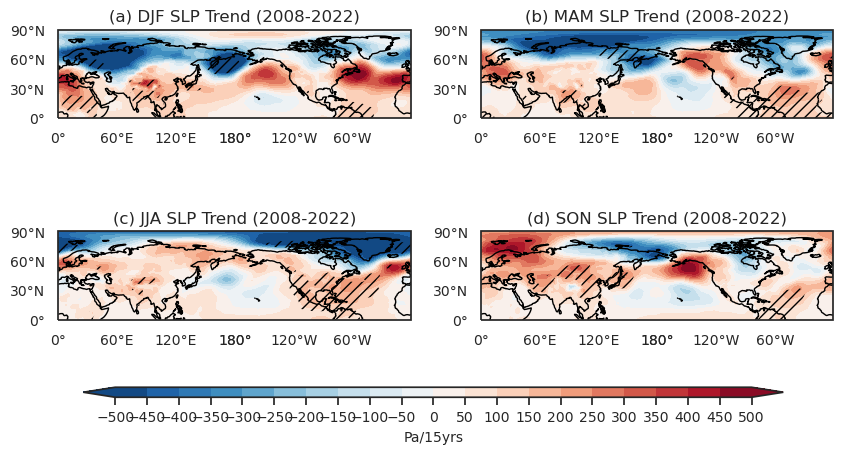

In [17]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from matplotlib.colors import BoundaryNorm, ListedColormap
import seaborn as sns
sns.set_theme(style="white")

# Create a new figure and axis
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(2, 2, figure=fig, wspace=0.2, hspace=0.1) 

# Define the levels and colormap
levels = np.arange(-500.0, 550.0, 50)
cmap = ListedColormap(sns.color_palette("RdBu_r", n_colors=len(levels)-1).as_hex())

sig_levels = np.array([-0.05, 0.05])
sig_cmap = ListedColormap(['none', 'none'])

# Loop through each season and plot the data
for i, season in enumerate(['DJF', 'MAM', 'JJA', 'SON']):
    trend_data = globals()[f'trend_{season}_data']
    sig_data = globals()[f'sig_{season}_data']
    # Create a new subplot for the current season
    ax = fig.add_subplot(gs[i//2, i%2], projection=ccrs.PlateCarree(central_longitude=180))
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([0, 30, 60, 90], crs=ccrs.PlateCarree())
    ax.coastlines()
    # ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='white')
    ax.set_title(season, fontsize=10, fontweight='medium')
    
    # Plot the trend data for the current season
    trend_contours = ax.contourf(trend_data['longitude'], trend_data['latitude'], trend_data, levels=levels, cmap=cmap, extend='both', transform=ccrs.PlateCarree())

    # Plot the significant test results for the current season
    sig_contours = ax.contourf(sig_data['longitude'], sig_data['latitude'], sig_data, levels=sig_levels, hatches=['', '///'], cmap=sig_cmap, extend='both', transform=ccrs.PlateCarree())
    
    ax.xaxis.set_major_formatter(cticker.LongitudeFormatter())
    ax.yaxis.set_major_formatter(cticker.LatitudeFormatter())
    ax.tick_params(labelsize=10)
    # Remove x label for upper plots and y label for right plots
    if i in [0, 1]:
        ax.set_xlabel('')
    if i in [1, 3]:
        ax.set_ylabel('')
    # Set the title of the plot
    plt.title(f'({chr(97+i)}) {season} SLP Trend (2008-2022)')

# Add a colorbar to the figure for trend values
trend_cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])
trend_cbar = fig.colorbar(trend_contours, cax=trend_cbar_ax, orientation='horizontal', ticks=levels)
trend_cbar.ax.tick_params(labelsize=10)
trend_cbar.set_label('Pa/15yrs', fontsize=10)

# Save the figure
plt.savefig('2008-2022_seasonal_slp_trend_pattern.png', dpi=300, bbox_inches='tight')
plt.show()
